# КТ-1 Отчет об олимпийских играх
## Э-1813 Булыгин Максим

Подключаем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Импортируем данные.

In [2]:
df = pd.read_csv('athlete_events.csv')

Проверяем качество данных.

In [3]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Проверим данные на наличие пропусков. Так как медалистами являются только малая часть всех атлетов, то не будет считать пустое значение в столбце Medal за пропуск.

In [5]:
dfnan = df[df.drop(columns=["Medal"]).isnull().any(axis=1)]
dfnan

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


Видим, что более 64-х тысяч наблюдений имеют пропущенные значения. Предположим, что бОльшая часть пропущенных значений - это олимпийские игры 1-ой половины 20 века, когда вести учет информации о спортсменах было тяжелее.

In [6]:
dfnan["Year"].value_counts()

1952    7300
1936    6505
1948    6464
1924    5111
1928    4908
1920    3864
1956    3839
1912    3489
1992    3304
1932    2829
1908    2735
1996    1942
1900    1865
1906    1532
1960    1197
1904    1182
1988    1040
1976     935
1964     769
1980     720
1984     720
1972     477
2012     396
1896     340
1968     276
2016     245
2014     218
2008     200
1994     189
2000     139
1998      87
2002      49
2004      44
2010      24
2006      17
Name: Year, dtype: int64

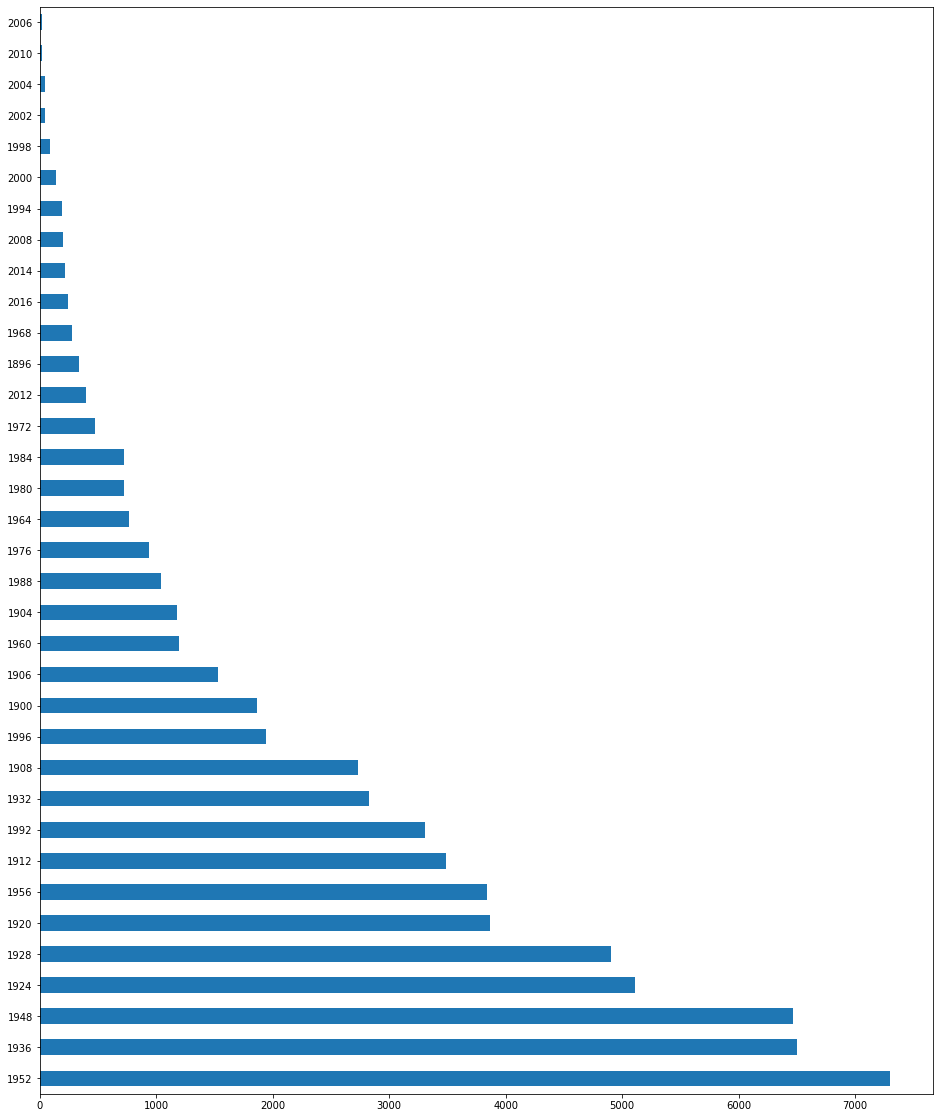

In [7]:
dfnan["Year"].value_counts().plot.barh(figsize=(16,20));

Видим, что, действительно, наибольшее количество пропусков в значениях - это 20-й век, а наименьшее количество пропущенных значений приходятся на конец 90-х, нулевые и 10-е годы.

In [8]:
df_sum = df[df["Season"] == "Summer"]
df_win = df[df["Season"] == "Winter"]
years_sum = np.sort(list(set(df_sum["Year"])))
years_win = np.sort(list(set(df_win["Year"])))

Посмотрим на количество участников мужчин и женщих в олимпийских играх.

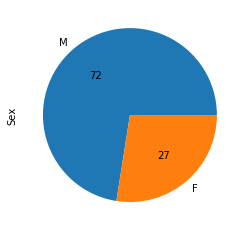

In [9]:
df["Sex"].value_counts().plot(kind="pie",autopct='%d');

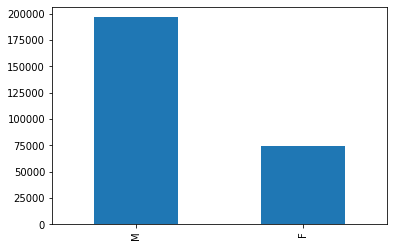

In [10]:
df["Sex"].value_counts().plot.bar();  

Как видим, мужчин почти в два раза больше.

Сравним показатели тела мужчин и женщин.

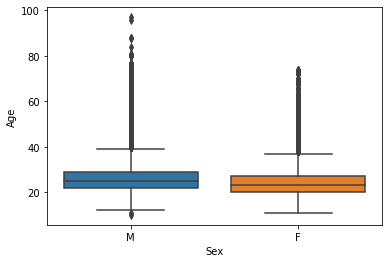

In [11]:
sns.boxplot(y='Age',x='Sex',
    data=df);

Как видим, довольно много выбросов по возрасту, как у мужчин, так и у женщин - видимо, в олимпийских играх могут учавствовать и пожилые люди. Средний возраст у мужчин - примерно 25 лет, у женщин аналогично.

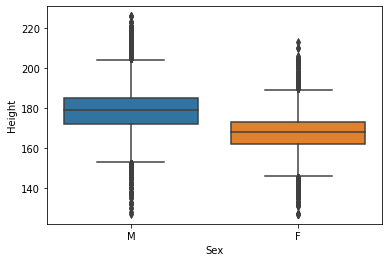

In [12]:
sns.boxplot(y='Height',x='Sex',
    data=df);

Как видим, много выбросов по росту - очень высокие, наверное, баскетболисты, волейболисты и хоккеисты, а низкие - легкоатлеты.
Средний рост у мужчин - примерно 180см, а у женщин - 170см.

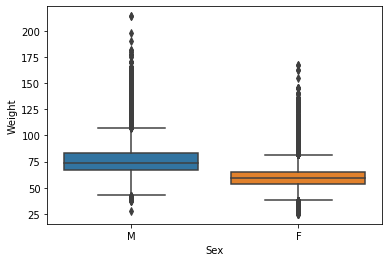

In [13]:
sns.boxplot(y='Weight',x='Sex',
    data=df);

Как видим, много выбросов по весу - очень тяжелые, наверное, сумоисты, дзюдоисты, рестлеры и тяжело-атлеты. Средний вес у мужчин - примерно 75кг, а у женщин - 62кг.

Посмотрим на количество стран-участниц в олимпийских играх.

In [15]:
years_sum

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016])

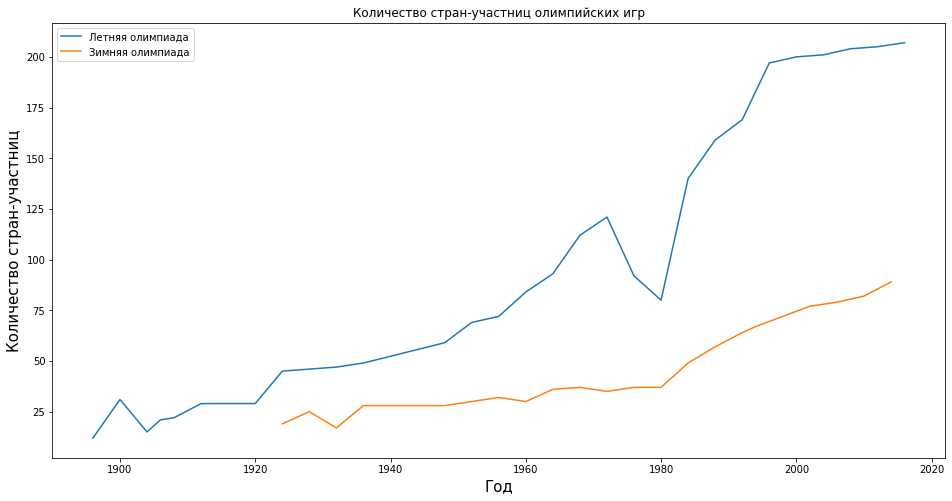

In [14]:
fig1, ax1 = plt.subplots(figsize = (16, 8))
ax1.plot(years_sum, df_sum[["Year", "NOC"]].groupby("Year")["NOC"].nunique(), label = 'Летняя олимпиада')
ax1.plot(years_win, df_win[["Year", "NOC"]].groupby("Year")["NOC"].nunique(), label = 'Зимняя олимпиада')
ax1.set_title('Количество стран-участниц олимпийских игр')
ax1.set_xlabel('Год', size = 15)
ax1.set_ylabel('Количество стран-участниц', size = 15)
ax1.legend(loc = 'upper left')
plt.show();

Посмотрим на матрицу совместных распределений роста, веса и возраста спортсменов. Ожидается, что распределение роста и веса будут нормальными, а распределение возраста будет иметь пик в 20-30 лет.

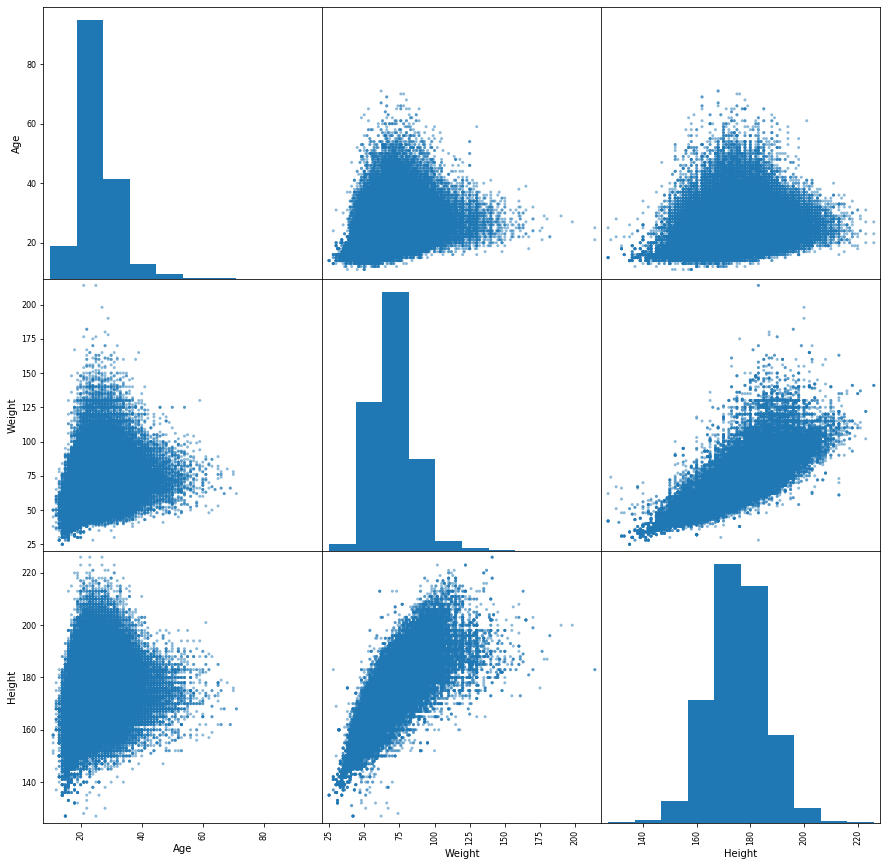

In [60]:
pd.plotting.scatter_matrix(df[["Age", "Weight", "Height"]], 
                          figsize=(15, 15), 
                           diagonal='hist'
                          );

2 и 3 распределения имеют распределения, похожие на нормальные, а в первом - пик в 20-30 лет. Гипотеза подтвердилась. Также хочется отметить положительную и ярко выраженную корреляцию веса от роста, и наоборот, соответственно.

Посмотрим на рост количества спортивных игр в олимпиаде с течением времени.

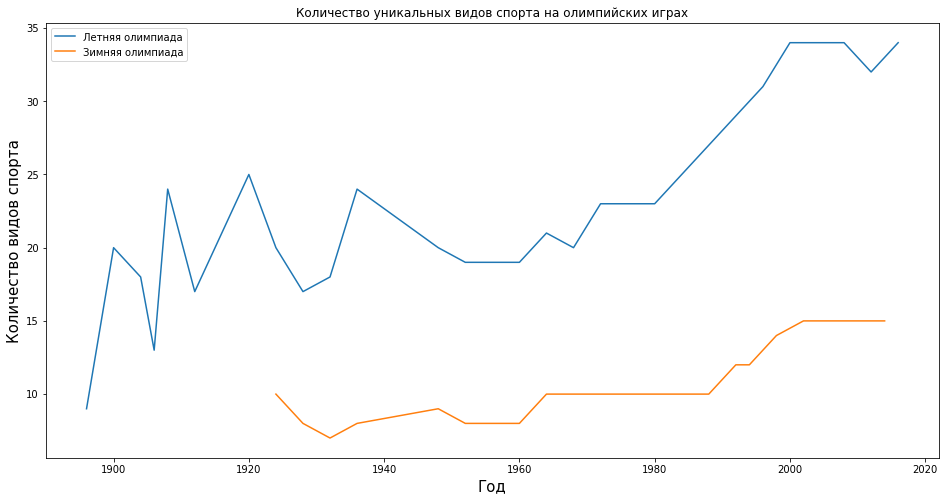

In [23]:
fig2, ax2 = plt.subplots(figsize = (16, 8))
ax2.plot(years_sum, df_sum[["Year", "Sport"]].groupby("Year")["Sport"].nunique(), label = 'Летняя олимпиада')
ax2.plot(years_win, df_win[["Year", "Sport"]].groupby("Year")["Sport"].nunique(), label = 'Зимняя олимпиада')
ax2.set_title('Количество уникальных видов спорта на олимпийских играх')
ax2.set_xlabel('Год', size = 15)
ax2.set_ylabel('Количество видов спорта', size = 15)
ax2.legend(loc = 'upper left')
plt.show();

In [36]:
df_sum[["Year", "City"]].groupby("City")["Year"].nunique()

City
Amsterdam         1
Antwerpen         1
Athina            3
Atlanta           1
Barcelona         1
Beijing           1
Berlin            1
Helsinki          1
London            3
Los Angeles       2
Melbourne         1
Mexico City       1
Montreal          1
Moskva            1
Munich            1
Paris             2
Rio de Janeiro    1
Roma              1
Seoul             1
St. Louis         1
Stockholm         2
Sydney            1
Tokyo             1
Name: Year, dtype: int64

Как видно, с течением времени становится все больше и больше видов спорта в программе зимних и летних олимпийских игр.

Посмотрим на распределения количества взятых медалей по странам.

In [39]:
dfteams = pd.crosstab(df['NOC'], df['Medal'])
dfteams["Summary"] = dfteams["Bronze"] + dfteams["Gold"] + dfteams["Silver"]
dfteams = dfteams.sort_values(by=['Summary'], ascending=False)
dfteams

Medal,Bronze,Gold,Silver,Summary
NOC,,,,
USA,1358,2638,1641,5637
URS,689,1082,732,2503
GER,746,745,674,2165
GBR,651,678,739,2068
FRA,666,501,610,1777
...,...,...,...,...
SEN,0,0,1,1
TGA,0,0,1,1
ERI,1,0,0,1


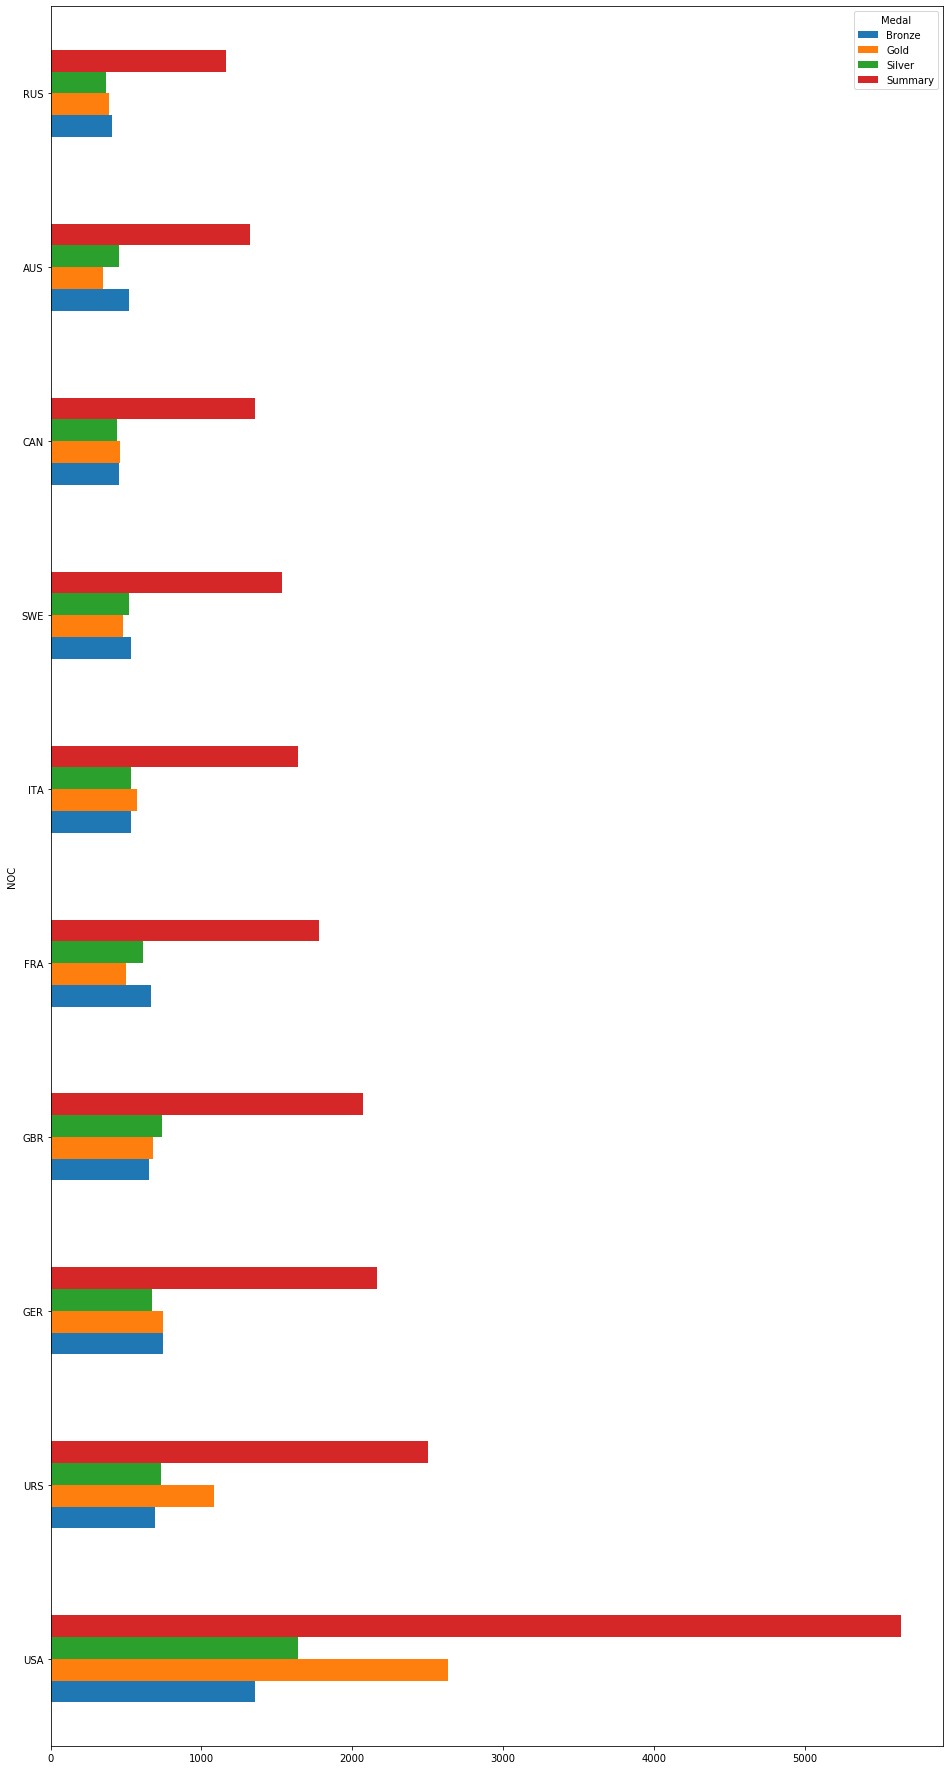

In [40]:
dfteams[dfteams["Summary"] >= 100][:10].plot.barh(figsize=(16,32));

Как видим, больше всего медалей у США, после - у СССР и Германии.

Посмотрим на популярность видов спорта с точки зрения количества участников в них

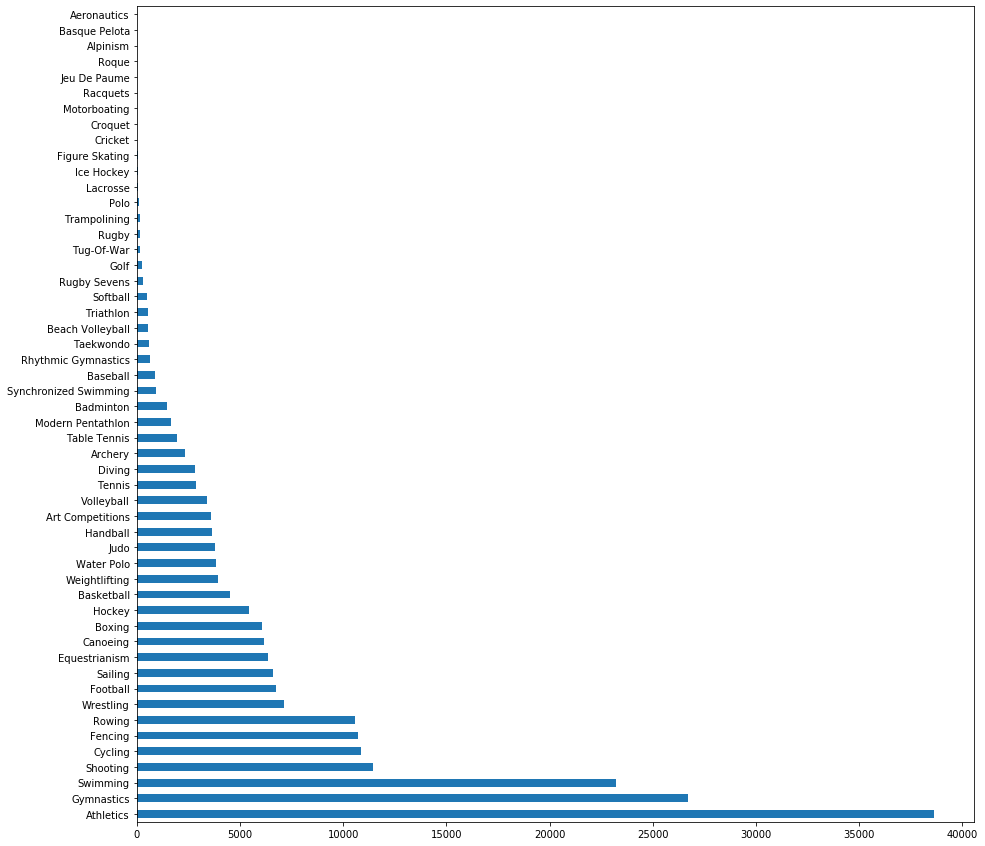

In [73]:
df[df["Season"]== "Summer"]['Sport'].value_counts().plot.barh(figsize=(15, 15));

В летних олимпийских играх самые популярные виды спорта с точки зрения количества участников в них - атлетика, гимнастика, плавание.

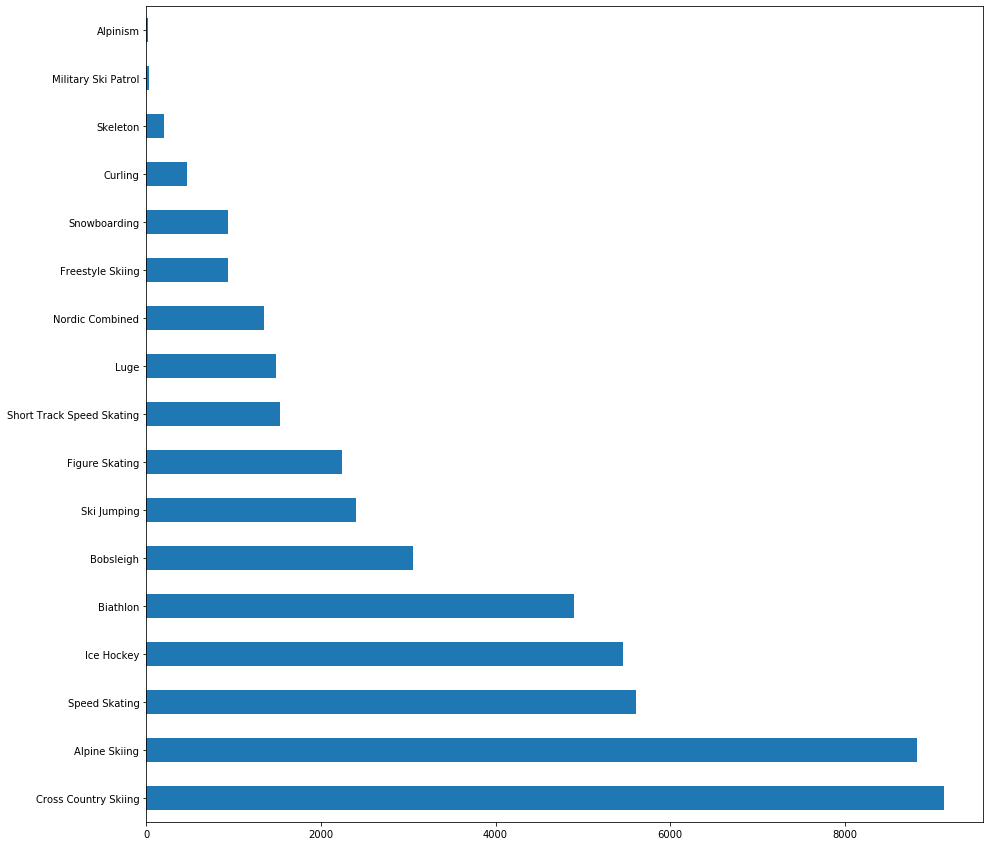

In [72]:
df[df["Season"]== "Winter"]['Sport'].value_counts().plot.barh(figsize=(15, 15));

В зимних олимпийских играх самые популярные виды спорта с точки зрения количества участников в них- лыжные гонки, горнолыжный спорт, конькобежный спорт и хоккей.

Посмотрим на то, как изменялось количество участников (мужчин, женщин и всего) олимпийских игр.

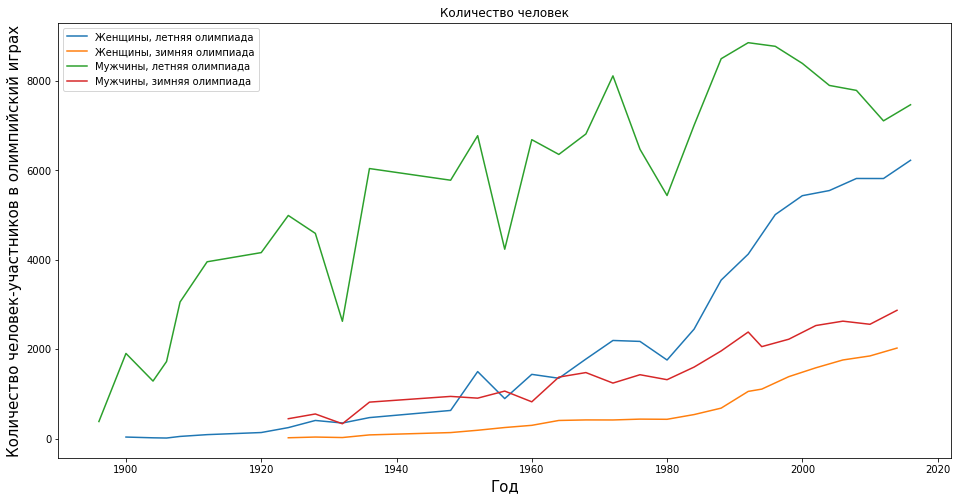

In [93]:
fig3, ax3 = plt.subplots(figsize = (16, 8))
ax3.plot(years_sum[1:], df_sum[df_sum.Sex == "F"][["Sex", "Year"]].groupby("Year")["Sex"].count(), 
         label = 'Женщины, летняя олимпиада')
ax3.plot(years_win, df_win[df_win.Sex == "F"][["Sex", "Year"]].groupby("Year")["Sex"].count(), 
         label = 'Женщины, зимняя олимпиада')
ax3.plot(years_sum, df_sum[df_sum.Sex == "M"][["Sex", "Year"]].groupby("Year")["Sex"].count(), 
         label = 'Мужчины, летняя олимпиада')
ax3.plot(years_win, df_win[df_win.Sex == "M"][["Sex", "Year"]].groupby("Year")["Sex"].count(), 
         label = 'Мужчины, зимняя олимпиада')
ax3.set_title('Количество человек')
ax3.set_xlabel('Год', size = 15)
ax3.set_ylabel('Количество человек-участников в олимпийский играх', size = 15)
ax3.legend(loc = 'upper left')
plt.show();

Как видим, после 90-х годов 20-го века пошел резкий рост числа женщин-участинц олимпийских игр.

Посмотрим на то, есть ли города, в которых олимпиада проходила более, чем один раз.

In [103]:
df[["Year", "City"]].groupby("City")["Year"].nunique().sort_values(ascending = False)

City
London                    3
Athina                    3
Los Angeles               2
Lake Placid               2
Innsbruck                 2
Paris                     2
Sankt Moritz              2
Stockholm                 2
Barcelona                 1
Beijing                   1
Berlin                    1
Calgary                   1
Atlanta                   1
Chamonix                  1
Cortina d'Ampezzo         1
Garmisch-Partenkirchen    1
Grenoble                  1
Helsinki                  1
Antwerpen                 1
Amsterdam                 1
Lillehammer               1
Vancouver                 1
Mexico City               1
Melbourne                 1
Sapporo                   1
Tokyo                     1
Sydney                    1
St. Louis                 1
Squaw Valley              1
Sochi                     1
Seoul                     1
Sarajevo                  1
Salt Lake City            1
Torino                    1
Roma                      1
Rio de Janeiro 

In [107]:
cities = df[["Year", "City"]].groupby("City")["Year"].nunique().sort_values(ascending = False)[:8]
cities

City
London          3
Athina          3
Los Angeles     2
Lake Placid     2
Innsbruck       2
Paris           2
Sankt Moritz    2
Stockholm       2
Name: Year, dtype: int64

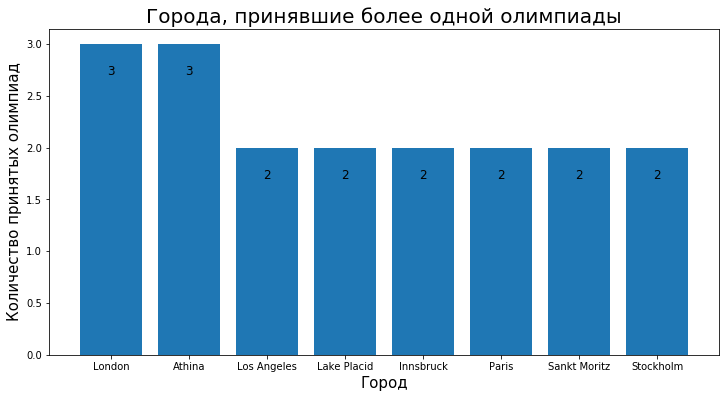

In [127]:
fig4, ax4 = plt.subplots(figsize = (12, 6))
ax4.bar(cities.index, cities)
ax4.set_title('Города, принявшие более одной олимпиады', size = 20)
ax4.set_xlabel('Город', size = 15)
ax4.set_ylabel('Количество принятых олимпиад', size = 15)
for i, v in enumerate(cities):
    ax4.text(i - 0.05 , v - 0.3 , str(v), size = 12)

Видим, что Лондон и Афины целых три раза принимали олимпийские игры.

Рассмотрим первые 20 стран по максимальному суммарному количеству участников за все годы.

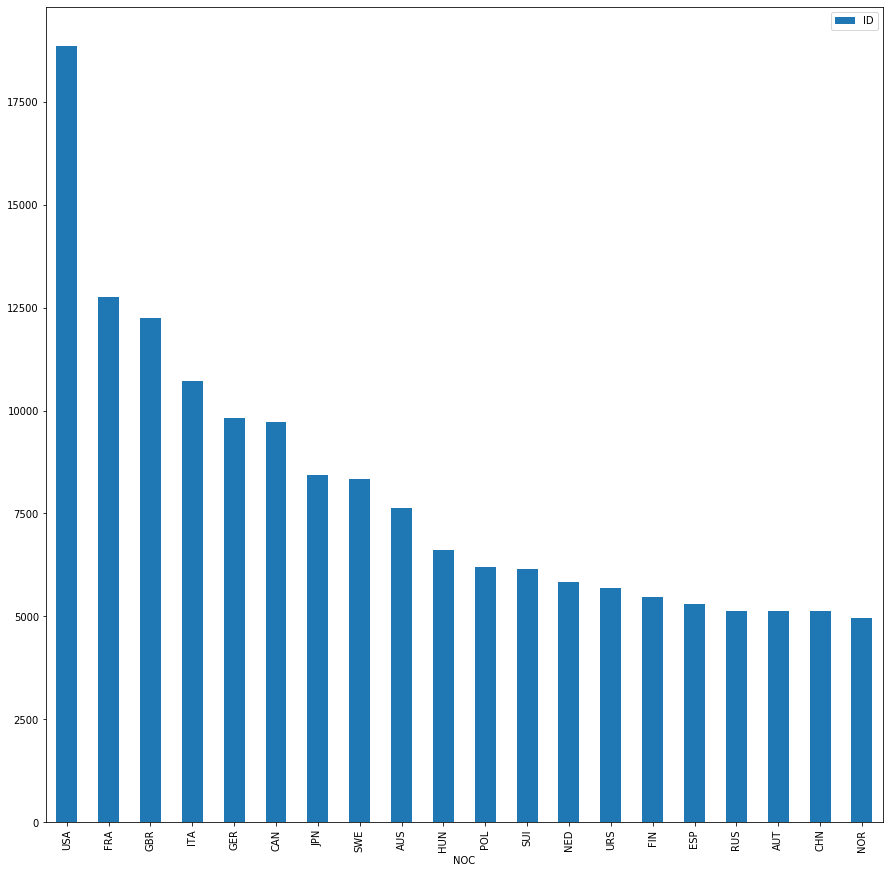

In [144]:
df[["NOC", "ID"]].groupby("NOC").count().sort_values(by="ID", ascending=False)[:20].plot.bar(figsize=(15, 15));

Как видим, абсолютные лидеры - США, Франция, Великобритания, Италия, Германия, Канада, Япония.

Вывод: таким образом, в ходе данной работы был выполнен аналитический и графический анализ статистических особенностей такого мероприятия, как олимпийские игры, за период более, чем 100 лет. К интересному можно отнести то, что основная масса атлетов в среднем возраста 25 лет; мужчины за весь переиод проведения олимпийский игр почти в два раза больше участвовали, чем женщины; абсолютными лидерами по количеству взятых медалей являются США и СССР, что удивительно, так как СССР распался почти 30 лет назад; количество женщин-участник постепенно растет, особенно это начало проявляться в период, начиная с 90-х годов 20-го века; города Лондон и Афины целых три раза принимали олимпиаду; количество стран-участниц постепенно растет, в сегодняшний день, во время текущей глобализации, оно близко к суммарному числу государств во всем мире - дается возможность поучаствовать абсолютно всем. Также было отмечено, что с течением времени накопленные данные становились все достовернее и точнее - становилось все меньше пропусков в наблюдениях.